In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to display the first five rows
dataframe = pd.read_csv("heart.csv")
dataframe.head()

,SN,biking,smoking,heartdisease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [ ]:
#to separate predictor attributes as 'X' and response variable as 'y'
X = dataframe.drop(['heartdisease', 'SN'], axis=1)
y = dataframe['heartdisease']
X.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


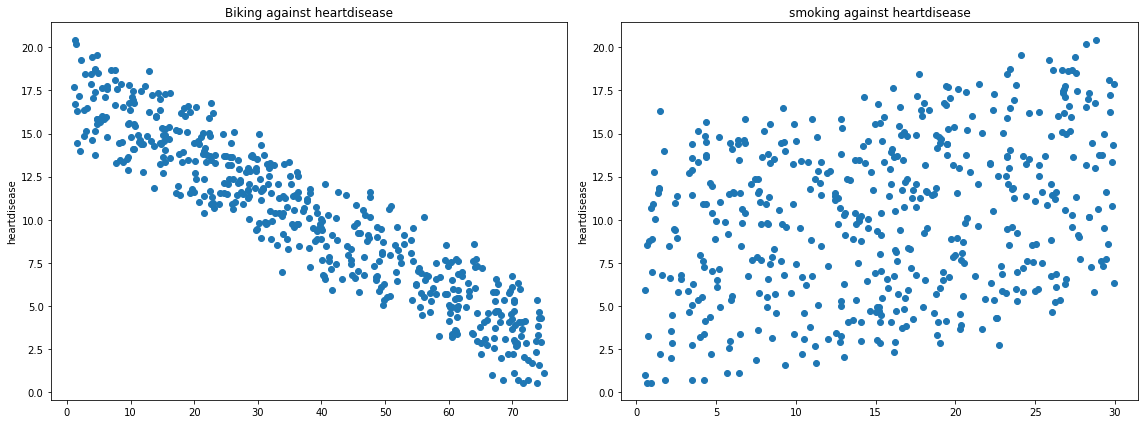

In [ ]:
#to visualize the relationship between each predictor attribute and response variable
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
axes[0].plot(dataframe['biking'],dataframe['heartdisease'], 'o')
axes[0].set_ylabel("heartdisease")
axes[0].set_title("Biking against heartdisease")
axes[1].plot(dataframe['smoking'],dataframe['heartdisease'], 'o')
axes[1].set_ylabel("heartdisease")
axes[1].set_title("smoking against heartdisease")
plt.tight_layout();

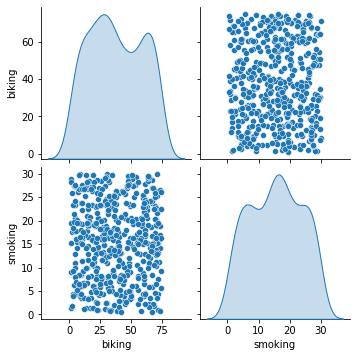

In [ ]:
#to visualize the relation between the two predictors
sns.pairplot(X,diag_kind='kde')

In [ ]:
# to split the dataset into training and test dataset
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
# random_state:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.head()

,biking,smoking
457,68.658906,22.430684
448,60.031747,11.368839
453,74.210494,22.585020
422,71.930577,19.416369
444,11.099022,17.527712


In [ ]:
y_train.head()


457     5.356975
448     5.072281
453     4.296377
422     4.113219
444    14.897961
Name: heartdisease, dtype: float64

In [ ]:
X_test.head()


,biking,smoking
202,20.640893,15.384138
308,60.021979,4.286810
59,26.397282,7.763930
419,4.731341,24.135972
435,57.475925,15.779072


In [ ]:
y_test.head()

202    14.557288
308     4.113879
59     11.024325
419    19.581726
435     6.036013
Name: heartdisease, dtype: float64

In [ ]:
#to fit the regression model using scikit-learn
from sklearn.linear_model import LinearRegression
lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
#to print the coefficients of the regression model
modelCoef = lregmodel.coef_
coeff_df = pd.DataFrame(modelCoef,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
biking,-0.200734
smoking,0.177306


In [ ]:
# We will only pass in test features (test dataset)
# The model predicts the predicted y (y hat)
# We can then compare these results to the true y test label value
test_predictions = lregmodel.predict(X_test)
test_predictions

array([13.62928654,  3.7565413 , 11.12267281, 18.37462844,  6.30527179,
        9.3252153 ,  5.24817269, 16.05351419,  6.74081974, 15.58372659,
        5.75829083,  4.13417795, 16.33720788,  8.86475295, 11.12302666,
       16.56120119, 17.47523005,  4.33220146, 11.73612225, 12.27814049,
       13.83796419,  7.05055566,  5.61519391, 11.51264348,  4.47429091,
       10.29453146,  6.19848589, 12.82248263, 13.13160622,  8.80045914,
       12.37156415,  7.03166687, 14.0224248 ,  3.53137189, 11.5268208 ,
       17.11287947,  7.80701479, 15.53981523,  8.3861583 , 12.09482428,
       17.44488565, 17.10978934, 16.20527417,  9.21509154, 15.01511647,
        7.50849707, 11.95671055, 13.31384861,  9.57386329, 13.00121031,
       10.97067755, 13.54191618,  9.82733935, 12.21023927,  2.07233688,
        9.60264047,  9.50537609, 15.26471415, 14.01749027,  9.47689283,
       12.5605789 ,  4.00394024,  8.07718783,  8.4711161 , 15.37952869,
       11.57206132, 14.96332558,  7.28209298,  7.34825042,  3.60

In [ ]:
#import the functions of the evaluation metrics and compute the metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

0.4780822454071985

In [ ]:
MSE


0.36120924064128823

In [ ]:
RMSE

0.6010068557356798

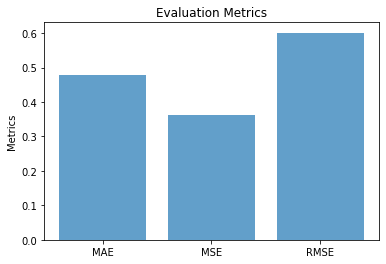

In [ ]:
#to plot the data
labels = ['MAE', 'MSE', 'RMSE']
values = [0.4780822454071985, 0.36120924064128823, 0.6010068557356798]

#Plot barchart
plt.bar(range(len(values)), values, align='center', alpha=0.7)
plt.xticks(range(len(labels)), labels)
plt.ylabel('Metrics')
plt.title('Evaluation Metrics')
plt.show()

In [ ]:
#to fit the regression model using scikit-learn
from sklearn.linear_model import LinearRegression
lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
#to predict risk of heart disease for 5human subjects
subject = [[3.99,13.00], [19.11,15.17], [44.43,19.66], [55.13,7.05], [34.22,15.05]]
subject = pd.DataFrame(subject, columns = ['biking', 'smoking'])
lregmodel.predict(subject)

array([16.54896186, 13.89862044,  9.61214422,  5.22845842, 10.84425477])